In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [10]:
trans = ["飛機", "汽車", "鳥", "貓",
         "鹿", "狗", "青蛙", "馬",
         "船", "卡車"]

是什麼? 貓


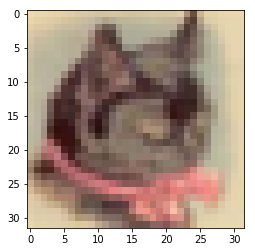

In [15]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
print("是什麼?", trans[y_train[c][0]])
plt.imshow(x_train[c])

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense
cnn = Sequential()
# CNN
cnn.add(Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(512, (3, 3), padding="same", activation="relu"))
cnn.add(Flatten())
# MLP
cnn.add(Dense(1024, activation="relu"))
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 512)         1180160   
__________

In [22]:
from keras.utils.np_utils import to_categorical
# 圖片: 0~1
x_train_norm = x_train / 255
x_test_norm = x_test / 255
# 答案: 10個機率(One-hot Encoding)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [23]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [ ]:
cnn.fit(x_train_norm, y_train_cat,
        batch_size=200, epochs=10,
        validation_split=0.1, verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 421s - loss: 1.7355 - acc: 0.3610 - val_loss: 1.3828 - val_acc: 0.4944
Epoch 2/10
